In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.datasets import load_diabetes

In [2]:
# Load dataset
diabetes = load_diabetes(as_frame=True)
df = diabetes.frame

features = df.columns[:-1]  
target = "target"

X = df[features]
y = df[target]

imp = SimpleImputer(strategy="median")
X = pd.DataFrame(imp.fit_transform(X), columns=features)

# Optional: scale features (good practice for regression)
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=features)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [3]:
# Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=4, random_state=42)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("Training R2 Score:", r2_score(y_train, y_pred_train))
print("Testing R2 Score:", r2_score(y_test, y_pred_test))
print("Testing MSE:", mean_squared_error(y_test, y_pred_test))

Training R2 Score: 0.6014323444989667
Testing R2 Score: 0.3239689083020818
Testing MSE: 3649.4238895890826


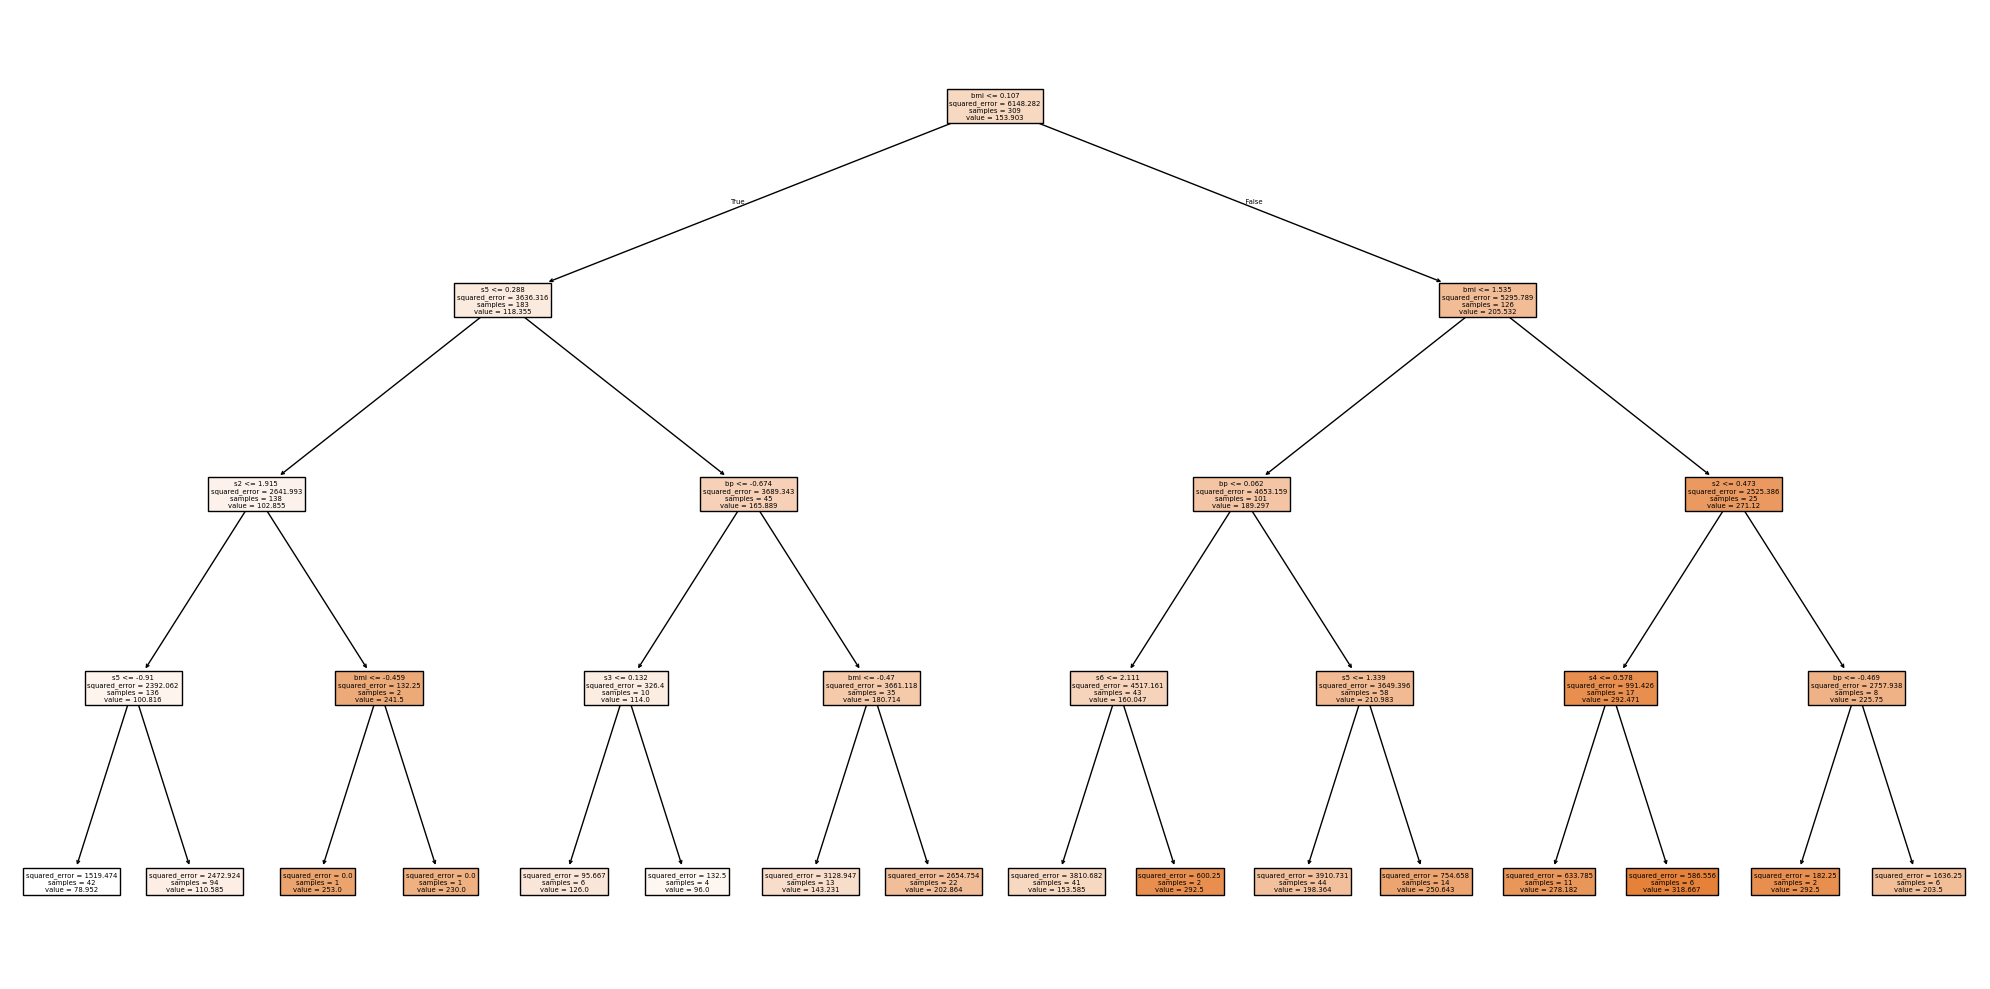

In [4]:
# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=X.columns,
    filled=True
)
plt.tight_layout()
plt.show()

In [6]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=501,
    max_depth=4,
    oob_score=True,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest Regressor OOB Score:", rf.oob_score_)
print("Random Forest Regressor R2 Score:", r2_score(y_test, y_pred))
print("Random Forest Regressor MSE:", mean_squared_error(y_test, y_pred))

Random Forest Regressor OOB Score: 0.4401360403467518
Random Forest Regressor R2 Score: 0.49341907746785874
Random Forest Regressor MSE: 2734.6797261285874


In [7]:
# Bagging Regressor

from sklearn.ensemble import BaggingRegressor

base_model = DecisionTreeRegressor(max_depth=4, random_state=42)

bagging = BaggingRegressor(
    estimator=base_model,
    n_estimators=201,
    random_state=42
)

bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)

print("Bagging Regressor R2 Score:", r2_score(y_test, y_pred))
print("Bagging Regressor MSE:", mean_squared_error(y_test, y_pred))

Bagging Regressor R2 Score: 0.49305201300334656
Bagging Regressor MSE: 2736.6612530764755


In [9]:
# from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

base_model = LinearRegression()

bagging = BaggingRegressor(
    estimator=base_model,
    n_estimators=201,
    random_state=42
)

bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)

print("Bagging Regressor R2 Score:", r2_score(y_test, y_pred))
print("Bagging Regressor MSE:", mean_squared_error(y_test, y_pred))

Bagging Regressor R2 Score: 0.47767234765618727
Bagging Regressor MSE: 2819.6854198952537
